 Now let's clean up and build a linear regression using pytorch only.

In [1]:
# include this before importing matplotlib
%matplotlib inline

1) Design model (input size, output size, forward pass) <br>
2) Construct loss and optimizer <br>
3) Training loop:<br>
    - forward pass: compute prediction and loss<br>
    - backward pass: gradients  
    - update weights

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### 0) prepare data, or make something up here

In [3]:
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [7]:
# numpy float is actually default to double
y_np.dtype

dtype('float64')

In [10]:
# convert from double to float for pytorch precision needs, double 64 will run pytorch in some error later
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y.shape

torch.Size([100])

In [19]:
X.requires_grad

False

In [11]:
# reshapre y
y = y.view(y.shape[0], 1)
y.shape

torch.Size([100, 1])

In [12]:
n_samples, n_features = X.shape
n_samples, n_features

(100, 1)

### 1) model

In [13]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

### 2) loss and optimizer

In [14]:
learning_rate = 0.01
criterion_func = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 3) training loop

In [15]:
n_epoch = 100

In [23]:
def training_loop(n_epoch: int):
    for e in range(n_epoch):
        # forward pass
        y_pred = model(X)
        loss = criterion_func(y, y_pred)
        # backward pass
        loss.backward()
        # update weight
        optimizer.step()
        # reset gradients
        optimizer.zero_grad()

        # logging
        if (e + 1) % 10 == 0:
            print(f'epoch: {e + 1}, loss: {loss.item():.4f}')

In [24]:
training_loop(n_epoch)

epoch: 10, loss: 4359.5474
epoch: 20, loss: 3251.7217
epoch: 30, loss: 2450.6252
epoch: 40, loss: 1870.6903
epoch: 50, loss: 1450.4274
epoch: 60, loss: 1145.5844
epoch: 70, loss: 924.2679
epoch: 80, loss: 763.4617
epoch: 90, loss: 646.5341
epoch: 100, loss: 561.4540


In [27]:
??X.detach

In [25]:
predicted = model(X).detach().numpy()

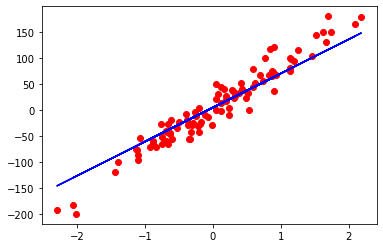

In [31]:
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, predicted, 'b')